<a href="https://colab.research.google.com/github/Sheethu1510/Traffic-Sign-Recognition-Using-Deep-Learning/blob/main/Traffic_Sign_Recognition_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path=kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")
print("Path do datset files:",path)

Path do datset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Layer,Dense,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import Normalization,Dropout,Activation
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns


## Data Visualization

In [ ]:
base_path='/kaggle/input/gtsrb-german-traffic-sign'
dataset_path=os.path.join(base_path,'Meta.csv')

In [ ]:
df=pd.read_csv(dataset_path)
df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [ ]:
df.shape

(43, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


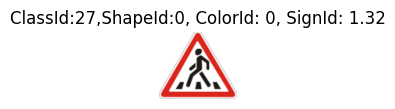

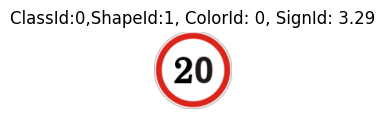

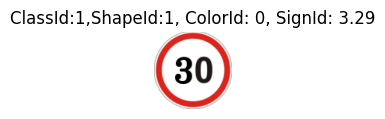

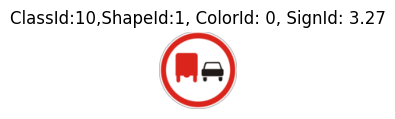

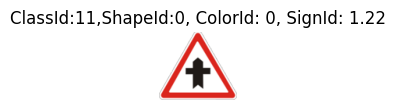

In [ ]:
for i in range(5):
  row=df.iloc[i]
  img=Image.open(f"{base_path}/{row['Path']}")
  plt.figure(figsize=(1,2))
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"ClassId:{row['ClassId']},ShapeId:{row['ShapeId']}, ColorId: {row['ColorId']}, SignId: {row['SignId']}")

## Feature Extracion and Image Resizing

In [ ]:
x=df[['Path','ShapeId','ColorId','SignId']]
y=df['ClassId']

In [ ]:
IMG_SIZE=64
base_path="/kaggle/input/gtsrb-german-traffic-sign/Train"

images=[]
labels=[]
images_per_class=60

for class_id in sorted(os.listdir(base_path)):
  class_path=os.path.join(base_path,class_id)
  if not os.path.isdir(class_path):
    continue
  img_files=os.listdir(class_path)[:images_per_class]
  for img_file in img_files:
    img_path=os.path.join(class_path,img_file)
    try:
      img=Image.open(img_path).convert("RGB").resize((IMG_SIZE,IMG_SIZE))
      img_array=np.array(img)/255.0
      images.append(img_array)
      labels.append(int(class_id))
    except:
      print(f'FAILED TO LOAD IMAGE: {img_path}')


## Train-Test Split

In [ ]:
x=np.array(images)
y=np.array(labels)

num_classes=len(np.unique(y))

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)
train_y_cat=to_categorical(y_train)
test_y_cat=to_categorical(y_test)

## Building the Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer,Conv2D,MaxPooling2D,Flatten,Dense,Dropout)
model=Sequential([
    InputLayer(shape=(IMG_SIZE,IMG_SIZE,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_classes,activation='softmax')

])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,643 (2.63 MB)

 Trainable params: 689,195 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_x.shape[0]

1806

In [ ]:
print(train_x.shape,train_y_cat.shape)
print(test_x.shape,test_y_cat.shape)
print(type(train_y_cat),train_y_cat.dtype)

(1806, 64, 64, 3) (1806, 43)
(774, 64, 64, 3) (774, 43)
<class 'numpy.ndarray'> float64


## Training

In [ ]:
history=model.fit(train_x,train_y_cat,epochs=15,validation_data=(test_x,test_y_cat),batch_size=32)

Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 378ms/step - accuracy: 0.0984 - loss: 4.5294 - val_accuracy: 0.0336 - val_loss: 3.7656
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 359ms/step - accuracy: 0.3918 - loss: 2.2830 - val_accuracy: 0.0711 - val_loss: 3.6137
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 340ms/step - accuracy: 0.6388 - loss: 1.3148 - val_accuracy: 0.0853 - val_loss: 3.6586
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 311ms/step - accuracy: 0.7206 - loss: 0.9749 - val_accuracy: 0.2674 - val_loss: 2.9862
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 306ms/step - accuracy: 0.7936 - loss: 0.6581 - val_accuracy: 0.3579 - val_loss: 2.6657
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.8578 - loss: 0.4849 - val_accuracy: 0.5349 - val_loss: 1.8134
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 338ms/step - accuracy: 0.9033 - loss: 0.3231 - val_accuracy: 0.6202 - val_loss: 1.3117
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 294ms/step - accuracy: 0.9056 - loss: 0.2781 - val_accu

## Evaluation and Visualization

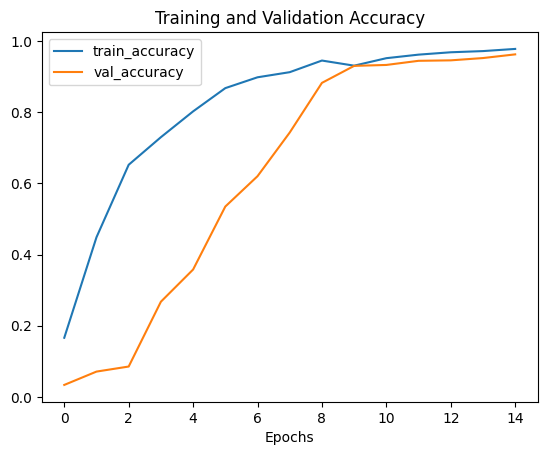

In [ ]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(test_x,test_y_cat)
print(f'Test accuracy:{test_acc*100:.2f}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


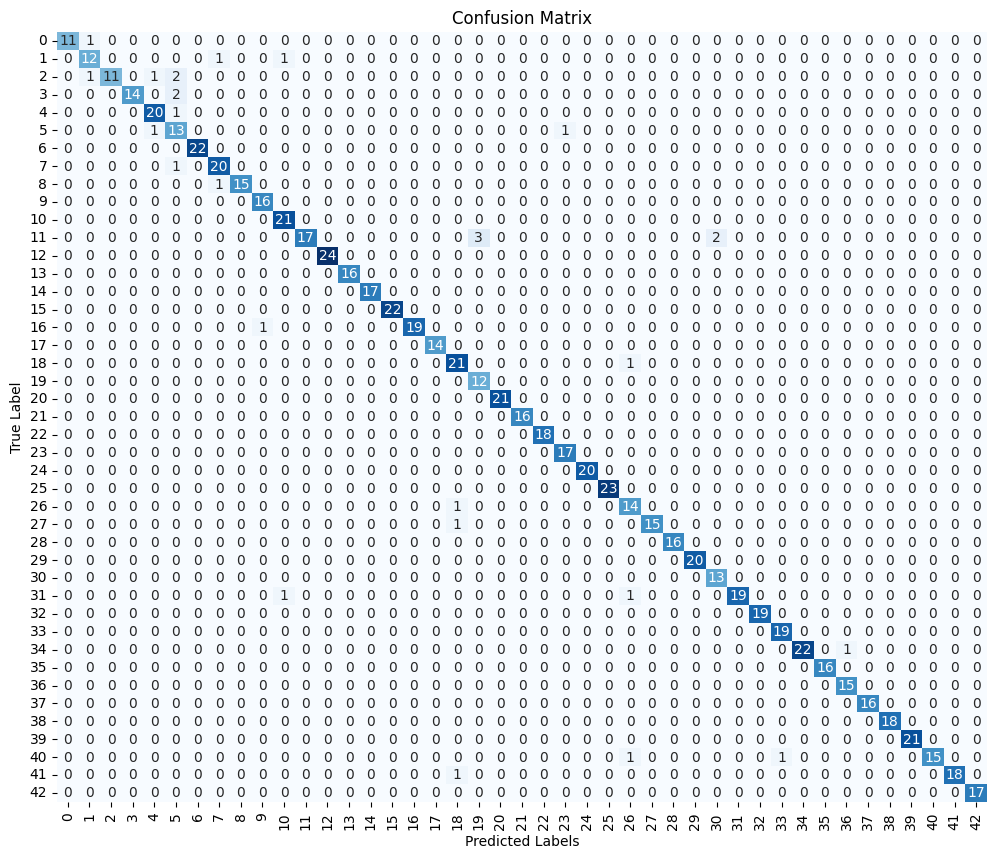

In [ ]:
y_pred_probs=model.predict(test_x)
y_pred=np.argmax(y_pred_probs,axis=1)
y_true=np.argmax(test_y_cat,axis=1)

cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()